In [1]:
import pandas as pd 


import matplotlib.pyplot as plt

# we use the scikit svm model for this experiment 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
import scikitplot as skplt

In [2]:
# import negative emotion labeled ads
df = pd.read_csv('./data/negative_emotion_dataset.csv').drop(columns= ['Unnamed: 0'])
df

,ad,neg_emo
0,x match your matching gift now will support hu...,1
1,volcán de fuego relief project we are sharing ...,1
2,stand with sharice gtgt republicans to drop a ...,1
3,a dedicated leader with proven experience and ...,1
4,years of obstruction corruption and failed le...,1
...,...,...
23995,oregon the top us producer of christmas trees ...,0
23996,the real winners when we invest in natgas and ...,0
23997,congresswoman mimi walters helped add almost ...,0
23998,trump brags that the economy is booming but s...,0


In [3]:
X_train, X_test,  y_train, y_test = train_test_split(df['ad'], df['neg_emo'], test_size =0.2, random_state=42)

In [4]:
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [5]:
# training the model using a linear kernal
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
clf.fit(X_train_tf, y_train)

SVC(gamma='auto', kernel='linear')

accuracy:   0.973
              precision    recall  f1-score   support

      no-neg       0.96      0.99      0.97      2409
         neg       0.99      0.96      0.97      2391

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800

confusion matrix:
[[2383   26]
 [ 105 2286]]



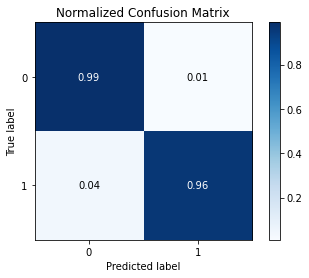

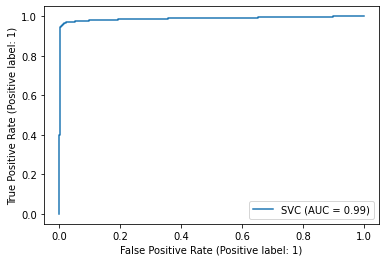

In [6]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no-neg', 'neg']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [7]:
df_val = pd.read_csv('./data/sample_negative_emotion.csv', index_col=0)
df_val

,ad,neg_emo
0,see why everyone is celebrating at hoblit dodg...,0
1,help give people without a home a chance to le...,0
2,i am so proud of what this grassroots team has...,0
3,we have until march st to raise money for our ...,0
4,learn how to use the new staffing law to impro...,0
...,...,...
195,ukraine needs your support\r\nany donation you...,0
196,help odessa help ukraine\r\nyour donations go ...,0
197,hundreds have been killed and scores more infl...,1
198,end of month is tomorrow less than hours to ...,0


accuracy:   0.775
                     precision    recall  f1-score   support

no-negative emotion       0.72      0.91      0.80       100
   negative emotion       0.88      0.64      0.74       100

           accuracy                           0.78       200
          macro avg       0.80      0.78      0.77       200
       weighted avg       0.80      0.78      0.77       200

confusion matrix:
[[91  9]
 [36 64]]



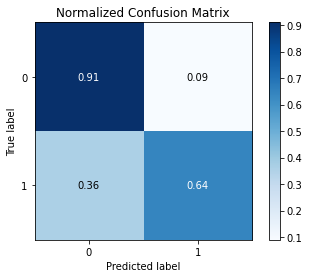

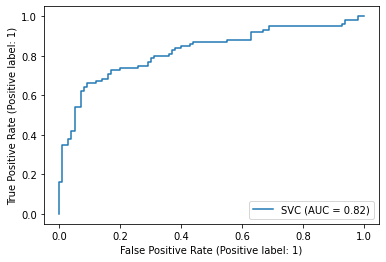

In [8]:
X_val = tf_vectorizer.transform(df_val['ad'])
y_val = df_val['neg_emo']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'no-negative emotion', 'negative emotion']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)